In [2]:
import sys
sys.path.append('.')
sys.path.append('..')
from lib.networks.model_repository import *
from lib.datasets.checkout import CheckoutDetection, CHECKOUT_ROOT
from lib.networks.net_utils import smooth_l1_loss, load_model, save_model, adjust_learning_rate
from torch.utils.data import DataLoader
from torch import nn, optim
import torch
import torch.nn.functional as F
import os
import time
from collections import OrderedDict
import argparse
import math

In [3]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [4]:
model = Resnet18_8s(ver_dim=201)

In [5]:
img = torch.randn(1, 3, 512, 512)
model.forward(img).shape

c:\users\lly\python\python36\lib\site-packages\torch\nn\modules\upsampling.py:129: UserWarning: nn.UpsamplingBilinear2d is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


torch.Size([1, 201, 512, 512])

In [6]:
dataset = CheckoutDetection(CHECKOUT_ROOT, 'val', show_images=False)

==> initializing checkout val data.
loading annotations into memory...
Done (t=0.70s)
creating index...
index created!


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

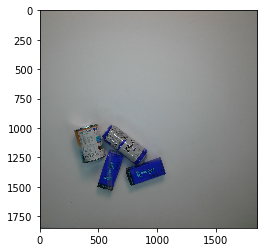

In [8]:
plt.imshow(dataset.pull_image(0)[1])

In [9]:
dataloader = DataLoader(dataset, batch_size=1,
                        shuffle=False, num_workers=4)

In [10]:
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched[0].shape, sample_batched[1].shape)

0 torch.Size([1, 3, 512, 512]) torch.Size([1, 201, 512, 512])
1 torch.Size([1, 3, 512, 512]) torch.Size([1, 201, 512, 512])
2 torch.Size([1, 3, 512, 512]) torch.Size([1, 201, 512, 512])
3 torch.Size([1, 3, 512, 512]) torch.Size([1, 201, 512, 512])
4 torch.Size([1, 3, 512, 512]) torch.Size([1, 201, 512, 512])
5 torch.Size([1, 3, 512, 512]) torch.Size([1, 201, 512, 512])
6 torch.Size([1, 3, 512, 512]) torch.Size([1, 201, 512, 512])
7 torch.Size([1, 3, 512, 512]) torch.Size([1, 201, 512, 512])
8 torch.Size([1, 3, 512, 512]) torch.Size([1, 201, 512, 512])
9 torch.Size([1, 3, 512, 512]) torch.Size([1, 201, 512, 512])
10 torch.Size([1, 3, 512, 512]) torch.Size([1, 201, 512, 512])
11 torch.Size([1, 3, 512, 512]) torch.Size([1, 201, 512, 512])
12 torch.Size([1, 3, 512, 512]) torch.Size([1, 201, 512, 512])
13 torch.Size([1, 3, 512, 512]) torch.Size([1, 201, 512, 512])
14 torch.Size([1, 3, 512, 512]) torch.Size([1, 201, 512, 512])
15 torch.Size([1, 3, 512, 512]) torch.Size([1, 201, 512, 512])
16

KeyboardInterrupt: 

In [ ]:
img = torch.randn(1, 3, 512, 512)
predicts = model.forward(img)

In [ ]:
from net_utils import smooth_l1_loss

In [ ]:
targets = torch.randn(1, 201, 512, 512)

In [ ]:
loss = smooth_l1_loss(predicts, targets, reduce=True)

In [ ]:
loss_val = torch.mean(loss)

In [ ]:
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.001,
                                momentum=0.9, weight_decay=0.0005)

In [ ]:
optimizer.zero_grad()
# loss.backward()
# optimizer.step()

In [ ]:
loss_val.backward()

In [ ]:
optimizer.step()

In [ ]:
math.isfinite(loss_val)

In [ ]:
predicts.dtype

In [50]:
predicts.double()

tensor([[[[ 0.3924,  0.2964, -0.0168,  ..., -0.1024, -0.0094, -0.0089],
          [ 0.2909,  0.4181,  0.0864,  ..., -0.2243, -0.3456, -0.4744],
          [ 0.1162,  0.2794,  0.1950,  ...,  0.0465, -0.3883, -0.5377],
          ...,
          [-0.1467,  0.4528,  0.0883,  ..., -0.1602, -0.3953, -0.1961],
          [-0.3059,  0.4234,  0.3419,  ..., -0.2531, -0.3291,  0.2472],
          [-0.0252,  0.5628,  0.6090,  ..., -0.1549, -0.0252, -0.0518]],

         [[-0.0018, -0.5024,  0.1642,  ..., -0.3408,  0.1723, -0.0093],
          [-0.3190, -0.2271, -0.3499,  ..., -0.0945,  0.0728,  0.0230],
          [-0.1102, -0.4576, -0.2726,  ..., -0.0768,  0.3547, -0.0126],
          ...,
          [ 0.1603,  0.1074,  0.2788,  ..., -0.0605,  0.1219,  0.1041],
          [ 0.2224,  0.0921,  0.6053,  ...,  0.1360,  0.2249, -0.1462],
          [ 0.0209, -0.4565,  0.1190,  ...,  0.1133,  0.0689,  0.1374]],

         [[ 0.1234,  0.2287, -0.2972,  ...,  0.3132,  0.1373,  0.2197],
          [ 0.4967, -0.1213,  

In [51]:
predicts.dtype

torch.float32

In [1]:
import torch
torch.cuda.is_available()

True

In [13]:
dataset[0][0].shape

torch.Size([3, 512, 512])

In [18]:
dataset[0][0].unsqueeze(0).shape    # 把一个样本变成一个batch

torch.Size([1, 3, 512, 512])

In [19]:
dataset[0][0].device

device(type='cpu')